# Look over data

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.fft import fft, fftfreq, ifft


%matplotlib inline

## Data Preparation

### Extract Taichung from Taiwan data

In [2]:
# data = pd.read_csv("combined.csv")
# mask = data['County'] == "臺中市"
# taichung = data[mask]
# taichung.to_csv('taichung.csv')

In [3]:
df = pd.read_csv('taichung.csv')
df.columns
#df=df.drop(['Unit','Longitude','Latitude','SiteId'], axis=1)


Index(['Unnamed: 0', 'SiteName', 'County', 'AQI', 'Pollutant', 'Status', 'SO2',
       'CO', 'O3', 'O3_8hr', 'PM10', 'PM2.5', 'NO2', 'NOx', 'NO', 'WindSpeed',
       'WindDirec', 'DataCreationDate', 'Unit', 'CO_8hr', 'PM2.5_AVG',
       'PM10_AVG', 'SO2_AVG', 'Longitude', 'Latitude', 'SiteId'],
      dtype='object')

### Extract Useful Columns

In [4]:
df = df[['SiteName', "DataCreationDate", "AQI"]]
df=df[df["SiteName"]!="崇倫"]

df["Date"] = pd.to_datetime(df["DataCreationDate"], format = "%Y-%m-%d %H:%M")
df = df.set_index(['Date'])
print(df)

                    SiteName  DataCreationDate    AQI
Date                                                 
2016-12-27 00:00:00       豐原  2016-12-27 00:00  123.0
2016-12-27 00:00:00       沙鹿  2016-12-27 00:00  102.0
2016-12-27 00:00:00       大里  2016-12-27 00:00  137.0
2016-12-27 00:00:00       忠明  2016-12-27 00:00   99.0
2016-12-27 00:00:00       西屯  2016-12-27 00:00  121.0
...                      ...               ...    ...
2016-12-02 23:00:00       豐原  2016-12-02 23:00   69.0
2016-12-02 23:00:00       沙鹿  2016-12-02 23:00   54.0
2016-12-02 23:00:00       大里  2016-12-02 23:00   56.0
2016-12-02 23:00:00       忠明  2016-12-02 23:00   66.0
2016-12-02 23:00:00       西屯  2016-12-02 23:00   59.0

[47700 rows x 3 columns]


In [53]:
df.index.max()

Timestamp('2018-01-08 23:00:00')

In [5]:
# Lists out Taichung's Sites
df['SiteName'].unique()

array(['豐原', '沙鹿', '大里', '忠明', '西屯'], dtype=object)

In [6]:
df.head()

,SiteName,DataCreationDate,AQI
Date,,,
2016-12-27,豐原,2016-12-27 00:00,123.0
2016-12-27,沙鹿,2016-12-27 00:00,102.0
2016-12-27,大里,2016-12-27 00:00,137.0
2016-12-27,忠明,2016-12-27 00:00,99.0
2016-12-27,西屯,2016-12-27 00:00,121.0


In [7]:
df["AQI"].describe()
# fill NAs with 0s
df["AQI"] = df["AQI"].fillna(0)

### Histogram

/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness 0.819677
Kurtosis 0.343364


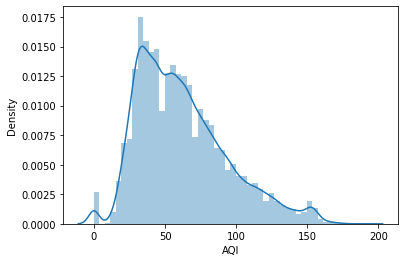

In [8]:
#sample = df['AQI'].sample(n=1000, random_state=1)
# plt.figure(figsize=((10,8)))
sns.distplot(df['AQI'])
print("Skewness %f" % df['AQI'].skew())
print("Kurtosis %f" % df['AQI'].kurt())




# Reduce/Remove Noise

## Fourier Transform

In [9]:
# from scipy.fft import fft, fftfreq

# # Number of samples in normalized_tone
# N = SAMPLE_RATE * DURATION

# yf = fft(normalized_tone)
# xf = fftfreq(N, 1 / SAMPLE_RATE)

# plt.plot(xf, np.abs(yf))
# plt.show()


In [10]:
def fft_denoiser(x, n_components, to_real=True):
    """Fast fourier transform denoiser.
    
    Denoises data using the fast fourier transform.
    
    Parameters
    ----------
    x : numpy.array
        The data to denoise.
    n_components : int
        The value above which the coefficients will be kept.
    to_real : bool, optional, default: True
        Whether to remove the complex part (True) or not (False)
        
    Returns
    -------
    clean_data : numpy.array
        The denoised data.
        
    References
    ----------
    .. [1] Steve Brunton - Denoising Data with FFT[Python]
       https://www.youtube.com/watch?v=s2K1JfNR7Sc&ab_channel=SteveBrunton
    
    """
    n = len(x)
    
    # compute the fft
    fft = np.fft.fft(x, n)
    
    # compute power spectrum density
    # squared magnitud of each fft coefficient
    PSD = fft * np.conj(fft) / n
    
    # keep high frequencies
    _mask = PSD > n_components
    fft = _mask * fft
    
    # inverse fourier transform
    clean_data = np.fft.ifft(fft)
    
    if to_real:
        clean_data = clean_data.real
    
    return clean_data

## Heatmap

<AxesSubplot:>

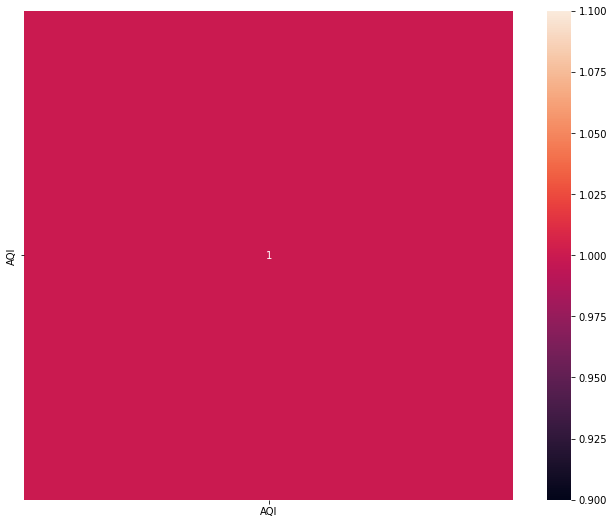

In [11]:
corrmap = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmap, square=True, annot=True)

In [12]:
# k = 10 #number of variables for heatmap
# cols = corrmap.nlargest(k, 'AQI')['AQI'].index
# cm = np.corrcoef(df[cols].values.T)
# print(df[cols].values.T)
# sns.set(font_scale=1.25)
# print(cm)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

# Testings

In [13]:
df_piv = df.pivot(columns='SiteName', values='AQI')
display(df_piv)

SiteName,大里,忠明,沙鹿,西屯,豐原
Date,,,,,
2016-11-25 13:00:00,25.0,23.0,21.0,24.0,23.0
2016-11-25 14:00:00,25.0,28.0,26.0,30.0,25.0
2016-11-25 15:00:00,31.0,34.0,31.0,36.0,31.0
2016-11-25 16:00:00,39.0,39.0,35.0,40.0,37.0
2016-11-25 17:00:00,44.0,42.0,36.0,42.0,41.0
...,...,...,...,...,...
2018-01-08 19:00:00,42.0,32.0,36.0,38.0,29.0
2018-01-08 20:00:00,38.0,30.0,32.0,37.0,31.0
2018-01-08 21:00:00,35.0,28.0,27.0,32.0,31.0


/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missin

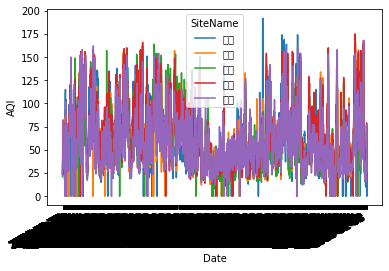

In [14]:
# ax = df_piv.plot(xticks=df_piv.index, ylabel='AQI')

In [15]:
"""Dumped things"""
# # sns.lineplot(data=df['AQI'])

# # sns.lineplot(x=df['Date'], y=df['AQI'], hue='SiteName')

# #fig, ax = plt.subplots(figsize=(20,20))
# grouped = df.groupby('SiteName')
# ncols=2
# nrows = int(np.ceil(grouped.ngroups/ncols))

# fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,30), sharey=True)



# for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
#     grouped.get_group(key).plot(ax=ax, legend=False)


# #df.groupby("SiteName").plot(x="Date", y="AQI", marker="o", ax=ax, legend=False)

'Dumped things'

In [16]:
df1 = df.reset_index().melt(id_vars=['SiteName'])
#print (df1)
df1.columns

#sns.stripplot(data=df1,hue='SiteName',x='Date',y='AQI')

<ipython-input-16-8bbd79914346>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  df1 = df.reset_index().melt(id_vars=['SiteName'])


Index(['SiteName', 'variable', 'value'], dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 37324 (\N{CJK UNIFIED IDEOGRAPH-91CC}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 24544 (\N{CJK UNIFIED IDEOGRAPH-5FE0}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26126 (\N{CJK UNIFIED IDEOGRAPH-660E}) missing from current font.
  func(*args, **kwargs)
/Users/chen_yenru/opt/anaconda3/envs/tflearn/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 27801 (\N{CJK UNIFIED IDEOGRAPH-6C99}) missin

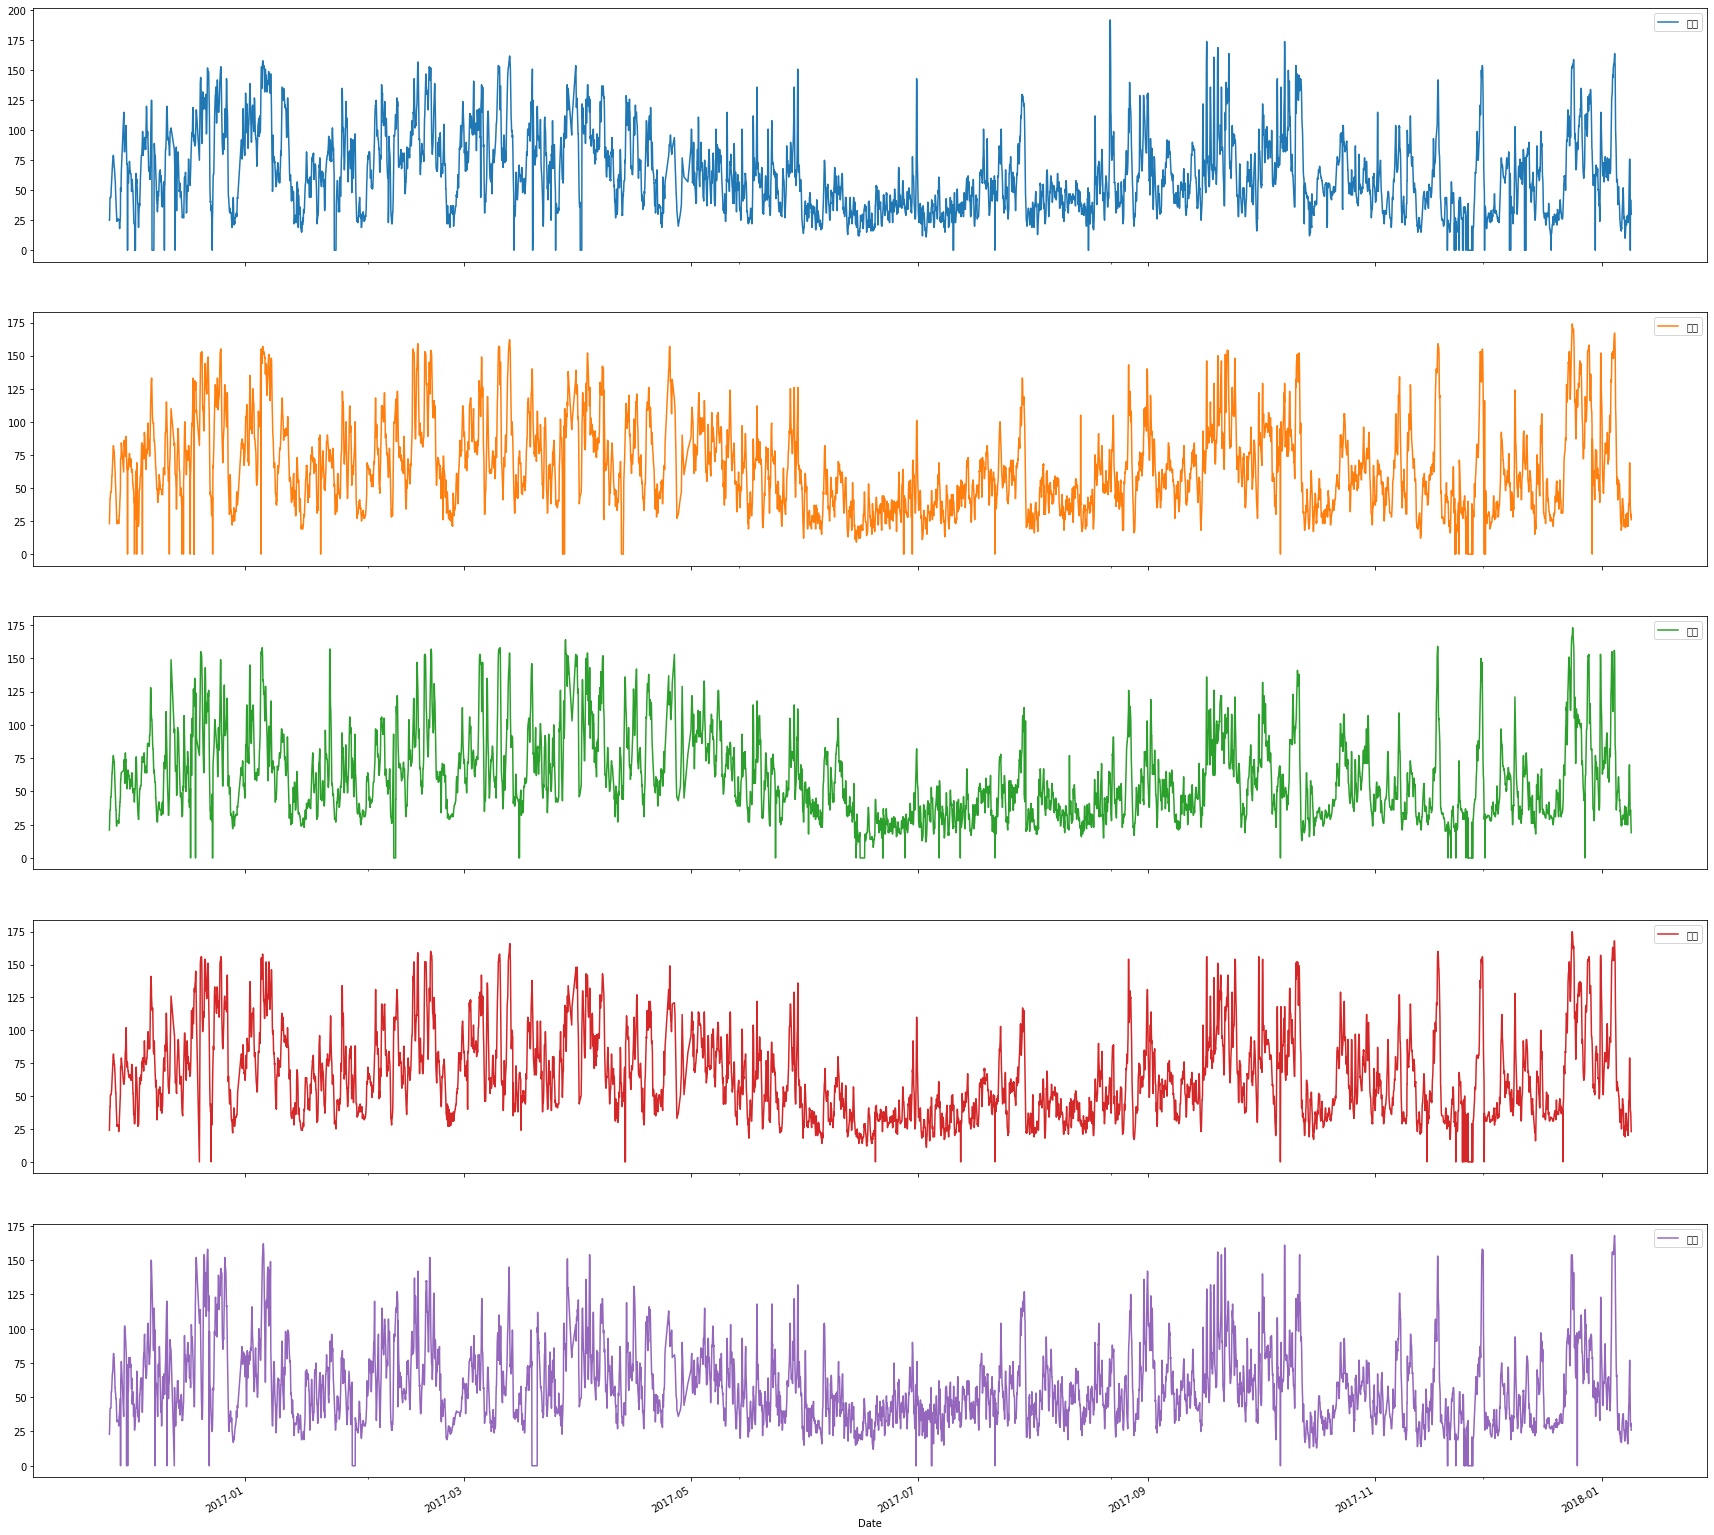

In [17]:
pd.pivot_table(df.reset_index(),
               index='Date', columns='SiteName', values='AQI'
              ).plot(subplots=True, figsize=(30,30))

In [18]:
mask_shitun = df['SiteName'] == '西屯'
shitun = df[mask_shitun]
print(shitun)

import scipy as sp
import scipy.fft

n = len(shitun['AQI'])
shitun['fft'] = fft_denoiser(shitun['AQI'], n, to_real=True)
print(shitun['fft'])


shitun['fftx2'] = fft_denoiser(shitun['AQI'], n*1.5, to_real=True)



                    SiteName  DataCreationDate    AQI
Date                                                 
2016-12-27 00:00:00       西屯  2016-12-27 00:00  121.0
2016-12-27 01:00:00       西屯  2016-12-27 01:00  115.0
2016-12-27 02:00:00       西屯  2016-12-27 02:00  114.0
2016-12-27 03:00:00       西屯  2016-12-27 03:00  118.0
2016-12-27 04:00:00       西屯  2016-12-27 04:00  129.0
...                      ...               ...    ...
2016-12-02 19:00:00       西屯  2016-12-02 19:00   66.0
2016-12-02 20:00:00       西屯  2016-12-02 20:00   64.0
2016-12-02 21:00:00       西屯  2016-12-02 21:00   64.0
2016-12-02 22:00:00       西屯  2016-12-02 22:00   62.0
2016-12-02 23:00:00       西屯  2016-12-02 23:00   59.0

[9540 rows x 3 columns]
Date
2016-12-27 00:00:00    73.031891
2016-12-27 01:00:00    75.421613
2016-12-27 02:00:00    77.249610
2016-12-27 03:00:00    78.421477
2016-12-27 04:00:00    78.877974
                         ...    
2016-12-02 19:00:00    57.072880
2016-12-02 20:00:00    60.374359
2016

<ipython-input-18-97e2d9288009>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun['fft'] = fft_denoiser(shitun['AQI'], n, to_real=True)
<ipython-input-18-97e2d9288009>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun['fftx2'] = fft_denoiser(shitun['AQI'], n*1.5, to_real=True)


<ipython-input-19-5ed8458efe9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun['Date'] = shitun.index


<AxesSubplot:xlabel='Date', ylabel='AQI'>

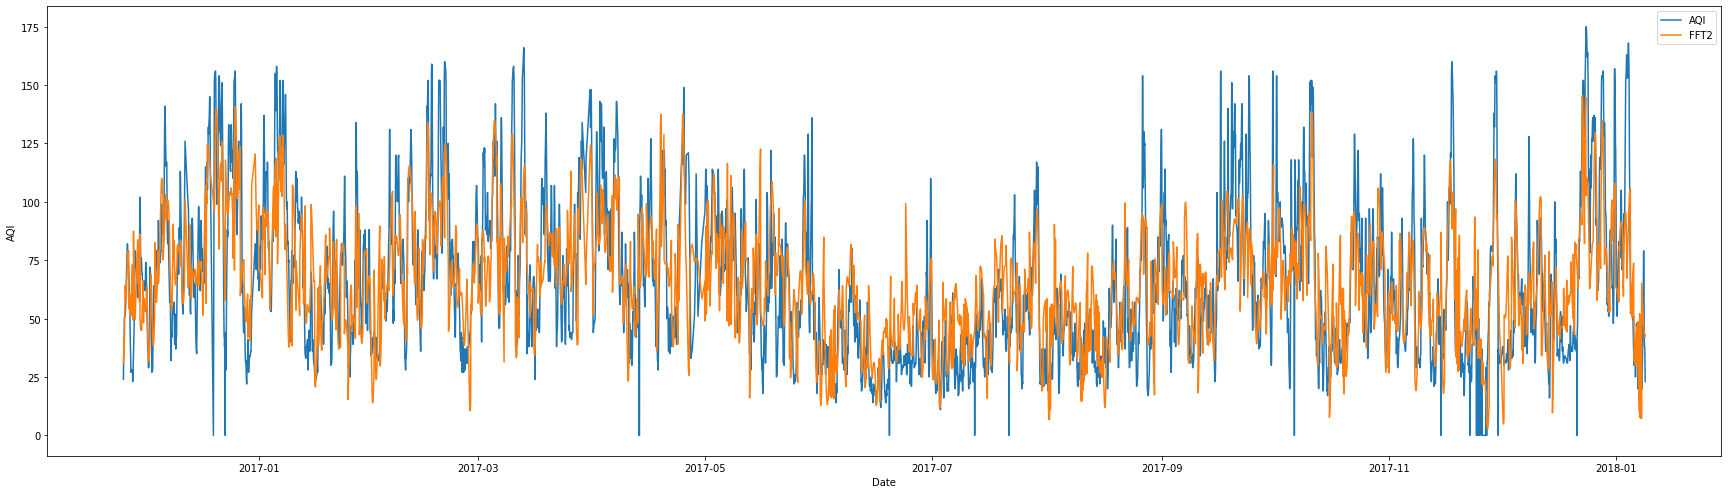

In [19]:
shitun['Date'] = shitun.index
fig, ax = plt.subplots()
fig.set_size_inches(30, 8.27)
sns.lineplot(x='Date', y='AQI', data=shitun, label='AQI')
sns.lineplot(x='Date', y='fftx2', data=shitun, label='FFT2')
#sns.lineplot(x='Date', y='fft', data=shitun, label='FFT')


<ipython-input-20-9d036946a2a6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun['smooth'] = signal.filtfilt(B,A, shitun['AQI'])


<AxesSubplot:xlabel='Date', ylabel='AQI'>

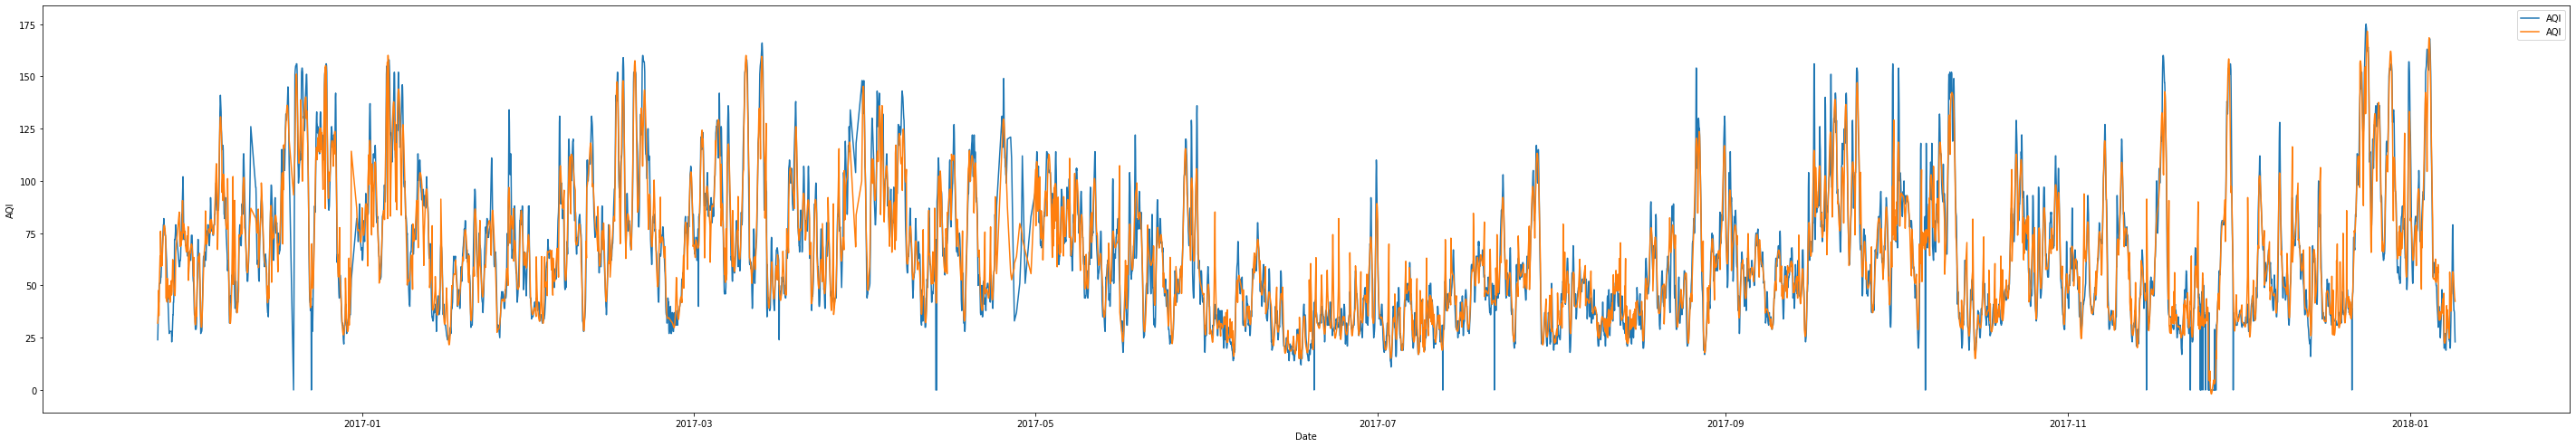

In [20]:
import scipy.signal as signal

# First, design the Buterworth filter
N  = 3    # Filter order
Wn = 0.1 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
shitun['smooth'] = signal.filtfilt(B,A, shitun['AQI'])

fig, ax = plt.subplots()
fig.set_size_inches(50, 8.27)
sns.lineplot(x='Date', y='AQI', data=shitun, label='AQI')
sns.lineplot(x='Date', y='smooth', data=shitun, label='AQI')
#plt.plot(shitun['smooth'],'b-')

2018-01-08 23:00:00


<ipython-input-50-1795a3678cfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun["Date"] = pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")


<AxesSubplot:xlabel='DataCreationDate'>

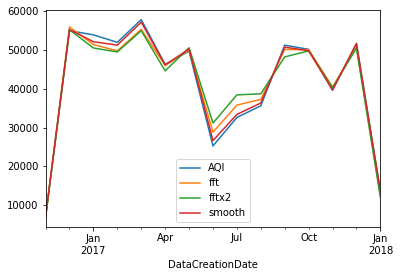

In [50]:
#hitun["Date"] = pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")
shitun["Date"] = pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")
shitun.index = shitun.set_index('Date')
td = shitun.set_index(pd.DatetimeIndex(pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")))
print(shitun["Date"].max())
td.resample('M').sum().plot()
# shitun.groupby(by=[shitun.index.month, shitun.index.year])
# weekly_summary = shitun.story_point.resample('W', on='date').sum()



<ipython-input-38-752435126864>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shitun['Date'] = pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")


AttributeError: 'Index' object has no attribute 'month'

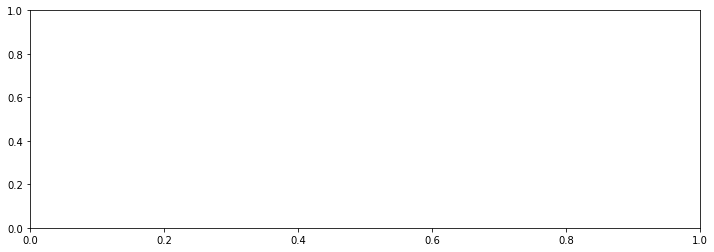

In [38]:

shitun['Date'] = pd.to_datetime(shitun["DataCreationDate"], format = "%Y-%m-%d %H:%M")
shitun.index = shitun.set_index(["Date"])
fig, axs = plt.subplots(figsize=(12, 4))
shitun.groupby(by=[shitun.index.month, shitun.index.year])
# shitun.groupby(shitun["Date"].dt.month)["AQI"].mean().plot(

#     kind='bar', rot=0, ax=axs

# )

In [22]:
from sklearn.neighbors import KNeighborsRegressor

clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')
x = shitun['DataCreationDate']
y = shitun['AQI']
clf.fit(X = x, 
        y = y)
y_pred = clf.predict(shitun.index.values)
ax = pd.Series(df.iloc[:, 0]).plot(color='lightgray')
pd.Series(y_pred).plot(color='black', ax=ax, figsize=(12, 8))



ValueError: could not convert string to float: '2016-12-27 00:00'